# Sistema de Ecuaciones ODE
### Sebastian Baquero

In [2]:
# Imports
import numpy as np∫
import matplotlib.pyplot as plt
#from bigfloat import *


### Euler hacia adelante
#### Se basa en encontrar iterativamente la funcion y(t) a través de la formula y u valor inicial. h es un delta definido por nosotros
#### y(t_0 + h) =y(t_0) + h*F(t_0,y_0) Es una aproximacion a y -> Esto nos da una serie de puntos que se acerca a la solucion del problema

1. Se defina una función para F(t,y) correspondiente a:  dy(t)/dt = F(t,y)
2. Se define un valor h (Este es el tamaño de los pasos que se daran en t. entre más pequeño la aproximación será mejor pero más iteraciones hará el algoritmo)
3. Se inicializa una variable con el valor de la condición inicial y_0
4. Se crea un arreglo de tiempo desde t_0 hasta el final del tiempo
5. Se crea un procedimiento iterativo que recorra todos los valores de tiempo del arreglo y para cada iteración aplicamos la formula

![image info](./Images/ecua1.png)

In [3]:
# Paso 1
def F1(t,y):
    return (0.49 - ((0.00245*np.exp(0.49 * t))/(0.49+0.005*(np.exp(0.49 * t)-1))))*y

# Paso 2
h = 0.001   

# Paso 3
y_0 = 0.01
t_0 = 0
t_f = 30

# Paso 4
T = np.arange(t_0,t_f+h,h)

# Paso 5
# Contiene los valores estimados de la solucion
yEulerFor = np.zeros(len(T))
# Ingresomos valor inicial
yEulerFor[0] = y_0
for i in range(1,len(T)):
    yEulerFor[i] = yEulerFor[i-1] + h*F1(T[i-1],yEulerFor[i-1])


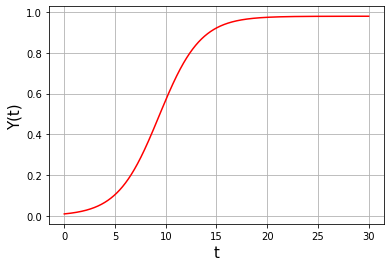

In [4]:
# Graficamos
plt.figure()
plt.plot(T,yEulerFor,'r')
plt.xlabel('t',fontsize=15)
plt.ylabel('Y(t)',fontsize=15)
plt.grid(1)
plt.show()

In [5]:
def soluAnalitic(t):
    a= 0.5
    b=0.01
    So = 0.99
    Io = 1-So
    N = So + Io
    return ((a*N-b)*Io*np.exp((a*N-b)*t)/((a*N-b)+a*Io*(np.exp((a*N-b)*t)-1)))

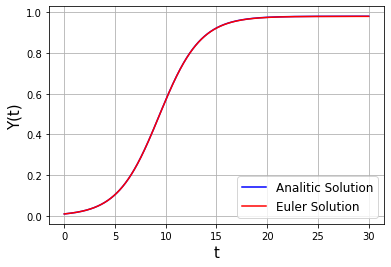

In [6]:
# Graficamos
plt.figure()
plt.plot(T,soluAnalitic(T),'b')
plt.plot(T,yEulerFor,'r')
plt.xlabel('t',fontsize=15)
plt.ylabel('Y(t)',fontsize=15)
plt.legend(['Analitic Solution','Euler Solution'],fontsize=12)
plt.grid(1)
plt.show()

#### Error local y acumulado
#### Error Local
E_i = |y(t_i) - `y(t_i)|
`y -> y gorro -> Estimación

### Euler hacia atrás
y(t_i) = y(t_(i-1)) + h*F(t_i,y(t_i))

- Aqui tenemos un problema ya que y(t_i) es lo que queremos hallar pero hace parte de la formula para hallarlo. Por lo tanto, se tendrá que manipular la ecuación para correjir el problema. La ecuación se manipula despejando y(t_i), despues de haber remplazado el valor de F


## Proyecto Final

In [7]:
# Proyecto Final


def dS(lmbda,beta,S,delta,I,L,mu):
    return lmbda - beta*S*(I + delta*L) - mu*S

def dE(beta,ro,S,I,delta,L,r_2,mu,kappa,r_1,E):
    return beta*(1 - ro)*S*(I + delta*L) + r_2*I - (mu + kappa*(1 - r_1))*E

def dI(beta,ro,S,I,delta,L,kappa,r_1,E,gamma,mu,d_1,fi,r_2):
    return beta*ro*S*(I + delta*L) + kappa*(1 - r_1)*E + gamma*L - (mu + d_1 + fi*(1 - r_2) + r_2)*I

def dL(fi,r_2,I,mu,d_2,gamma,L):
    return fi*(1 - r_2)*I - (mu + d_2 + gamma)*L





### Euler hacia adelante

In [8]:

# S_i =  S_(i-1) + h*dS(lmbda,beta,S_(i-1),delta,I_(i-1),L_(i-1),mu)
# ------ PARAMETROS -----
# TODO aqui falta poner los valores
beta = 0.3
fi = 0.02
mu = 0.0101
lmbda = 2/6480000000
delta = 1/6480000000
ro = 0.3
kappa = 0.005
r1= 0
r2= 0.8182
gamma = 0.01
d1= 0.022722
d2= 0.20

# Paso 2
h = 0.01  
# Paso 3
# 6.48 miles de millones
# 6,480,000,000 Poblacion 2009
# 2 billones infecatods (1/3)
# 2,000,000,000
# Nueva cantidad de infecatdos anual - > 9,000,000
# 2,000,000 de muertos anual
# CANTIDAD DE SUCEPTIBLES -> 4,480,000,000
# CANTIDAD DE INFECTADOS -> 1,200,000,000
# CANTIDAD DE INFECCIOSOS-> 600,000,000
# CANTIDAD DE PERDER RASTRO -> 200,000,000
s_0 = 4480000000
e_0 = 1200000000
i_0 = 600000000
l_0 = 200000000
t_0 = 0
# Ingresado por el usario en años
t_f = 30

# Paso 4
T = np.arange(t_0,t_f+h,h)

# Paso 5
# Contiene los valores estimados de la solucion
sEulerFor = np.zeros(len(T))
eEulerFor = np.zeros(len(T))
iEulerFor = np.zeros(len(T))
lEulerFor = np.zeros(len(T))
# Ingresomos valor inicial
sEulerFor[0] = s_0
eEulerFor[0] = e_0
iEulerFor[0] = i_0
lEulerFor[0] = l_0

for i in range(1,len(T)):
    sEulerFor[i] = sEulerFor[i-1] + h*dS(lmbda,beta,sEulerFor[i-1],delta,iEulerFor[i-1],lEulerFor[i-1],mu)
    iEulerFor[i] = iEulerFor[i-1] + h*dI(beta,ro,sEulerFor[i-1],iEulerFor[i-1],delta,lEulerFor[i-1],kappa,r1,eEulerFor[i-1],gamma,mu,d1,fi,r2)
    eEulerFor[i] = eEulerFor[i-1] + h*dE(beta,ro,sEulerFor[i-1],iEulerFor[i-1],delta,lEulerFor[i-1],r2,mu,kappa,r1,eEulerFor[i-1])
    lEulerFor[i] = lEulerFor[i-1] + h*dL(fi,r2,iEulerFor[i-1],mu,d2,gamma,lEulerFor[i-1])
    #print(f'S: {sEulerFor[i]}')
    #print(f'I: {iEulerFor[i]}')
    #print(f'E: {eEulerFor[i]}')
    #print(f'L: {lEulerFor[i]}')


<ipython-input-7-b77eb5bfa4b7>:5: RuntimeWarning: overflow encountered in double_scalars
  return lmbda - beta*S*(I + delta*L) - mu*S
<ipython-input-7-b77eb5bfa4b7>:11: RuntimeWarning: overflow encountered in double_scalars
  return beta*ro*S*(I + delta*L) + kappa*(1 - r_1)*E + gamma*L - (mu + d_1 + fi*(1 - r_2) + r_2)*I
<ipython-input-7-b77eb5bfa4b7>:8: RuntimeWarning: overflow encountered in double_scalars
  return beta*(1 - ro)*S*(I + delta*L) + r_2*I - (mu + kappa*(1 - r_1))*E
<ipython-input-7-b77eb5bfa4b7>:5: RuntimeWarning: invalid value encountered in double_scalars
  return lmbda - beta*S*(I + delta*L) - mu*S
<ipython-input-7-b77eb5bfa4b7>:11: RuntimeWarning: invalid value encountered in double_scalars
  return beta*ro*S*(I + delta*L) + kappa*(1 - r_1)*E + gamma*L - (mu + d_1 + fi*(1 - r_2) + r_2)*I
<ipython-input-7-b77eb5bfa4b7>:8: RuntimeWarning: invalid value encountered in double_scalars
  return beta*(1 - ro)*S*(I + delta*L) + r_2*I - (mu + kappa*(1 - r_1))*E


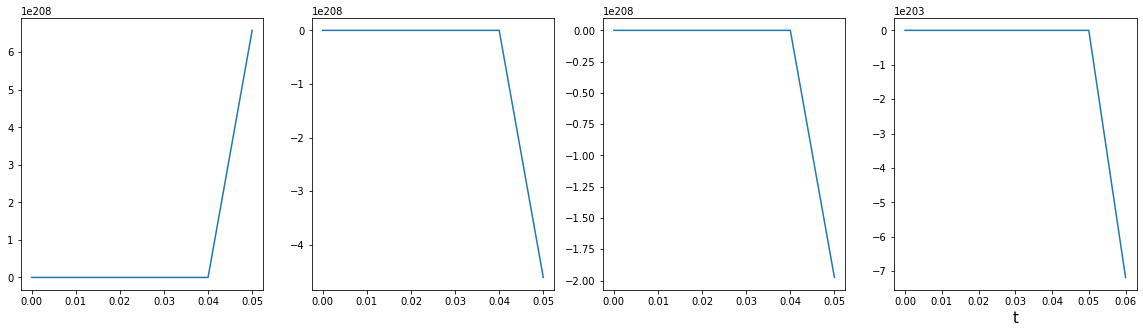

In [15]:
# Graficamos S(t)
fig, axs = plt.subplots(1,4,figsize=(20,5))
plt.xlabel('t',fontsize=15)
axs[0].plot(T,sEulerFor)
axs[1].plot(T,eEulerFor)
axs[2].plot(T,iEulerFor)
axs[3].plot(T,lEulerFor)
plt.show()

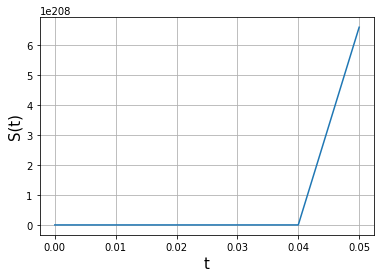

In [17]:
# Graficamos S(t)
plt.figure()
plt.plot(T,sEulerFor)
plt.xlabel('t',fontsize=15)
plt.ylabel('S(t)',fontsize=15)
plt.grid(1)
plt.show()

### Euler hacia atrás
Hay que manipular las 4 ecuaciones para que podamos aplicar el metodo

In [22]:
def dSBack(lmbda,beta,S,delta,I,L,mu):
    return S + h*(lmbda - beta*S*(I+delta*L))/(1+h*mu)

def dEBack(beta,ro,S,I,delta,L,r_2,mu,kappa,r_1,E):
    return E + h*(beta*(1-ro)*S*(I+delta*L)+r_2*I)/(1+h*(mu+kappa*(1-r_1)))

def dIBack(beta,ro,S,I,delta,L,kappa,r_1,E,gamma,mu,d_1,fi,r_2):
    return I + h*(beta*ro*S*(1+delta*L)+kappa*(1-r_1)*E+gamma*L)/(1+h*(mu*d_1+fi*(1-r_2)+r_2))

def dLBack(fi,r_2,I,mu,d_2,gamma,L):
    return L + h*(fi*(1-r_2)*I)/(1+h*(mu*d_2+gamma))
    

In [23]:
# Parametros y valores iniciales
s_0 = 4480000000
e_0 = 1200000000
i_0 = 600000000
l_0 = 200000000
t_0 = 0
# Ingresado por el usario en años
t_f = 30

# Paso 4
T = np.arange(t_0,t_f+h,h)

# Paso 5
# Contiene los valores estimados de la solucion
sEulerB = np.zeros(len(T))
eEulerB = np.zeros(len(T))
iEulerB = np.zeros(len(T))
lEulerB = np.zeros(len(T))
# Ingresomos valor inicial
sEulerB[0] = s_0
eEulerB[0] = e_0
iEulerB[0] = i_0
lEulerB[0] = l_0

for i in range(1,len(T)):
    sEulerB[i] = dSBack(lmbda,beta,sEulerB[i-1],delta,iEulerB[i-1],lEulerB[i-1],mu)
    iEulerB[i] = dIBack(beta,ro,sEulerB[i-1],iEulerB[i-1],delta,lEulerB[i-1],kappa,r1,eEulerB[i-1],gamma,mu,d1,fi,r2)
    eEulerB[i] = dEBack(beta,ro,sEulerB[i-1],iEulerB[i-1],delta,lEulerB[i-1],r2,mu,kappa,r1,eEulerB[i-1])
    lEulerB[i] = dLBack(fi,r2,iEulerB[i-1],mu,d2,gamma,lEulerB[i-1])

<ipython-input-22-34ce52efad27>:2: RuntimeWarning: overflow encountered in double_scalars
  return S + h*(lmbda - beta*S*(I+delta*L))/(1+h*mu)
<ipython-input-22-34ce52efad27>:5: RuntimeWarning: overflow encountered in double_scalars
  return E + h*(beta*(1-ro)*S*(I+delta*L)+r_2*I)/(1+h*(mu+kappa*(1-r_1)))
<ipython-input-22-34ce52efad27>:2: RuntimeWarning: invalid value encountered in double_scalars
  return S + h*(lmbda - beta*S*(I+delta*L))/(1+h*mu)
<ipython-input-22-34ce52efad27>:5: RuntimeWarning: invalid value encountered in double_scalars
  return E + h*(beta*(1-ro)*S*(I+delta*L)+r_2*I)/(1+h*(mu+kappa*(1-r_1)))


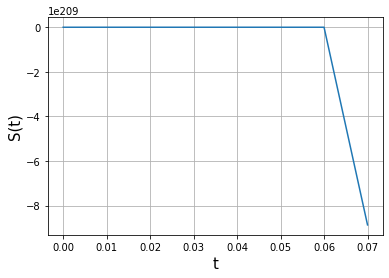

In [24]:
# Graficamos S(t)
plt.figure()
plt.plot(T,sEulerB)
plt.xlabel('t',fontsize=15)
plt.ylabel('S(t)',fontsize=15)
plt.grid(1)
plt.show()